**Creating a model which can classify a given image as Horse/Human using Convolutional Neural Network**

In [0]:
#Import required packages
import tensorflow as tf
import os
import zipfile

In [2]:
#Now, download the dataset which is located on some server
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-13 15:36:39--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   115MB/s    in 1.2s    

2020-06-13 15:36:41 (115 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [23]:
#Validation set/ Validation set folder
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-06-13 18:37:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  41.8MB/s    in 0.3s    

2020-06-13 18:37:12 (41.8 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
zipfile_location = "/tmp/horse-or-human.zip"
unzip_file = zipfile.ZipFile(zipfile_location, 'r')
unzip_file.extractall('/tmp/horse-or-human')

zipfile_loc = "/tmp/horse-or-human.zip"
zipfile2 = zipfile.ZipFile('/tmp/validation-horse-or-human.zip', 'r')
zipfile2.extractall('/tmp/validation-horse-or-human')
unzip_file.close()

In [0]:
#Defining our directory names as they are already separated...
#Define Horses directory
horse_train_dir = os.path.join('/tmp/horse-or-human/horses')
human_train_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [28]:
#Let's check how the files are in the directories we have in horses & humans
horse_files = os.listdir(horse_train_dir)
print(horse_files[:5])

human_files = os.listdir(human_train_dir)
print(human_files[:5])

validation_horse_hames = os.listdir(validation_horse_dir)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse45-9.png', 'horse39-8.png', 'horse14-5.png', 'horse26-8.png', 'horse15-5.png']
['human17-11.png', 'human13-09.png', 'human14-13.png', 'human13-13.png', 'human12-23.png']
['horse1-298.png', 'horse4-541.png', 'horse1-105.png', 'horse4-345.png', 'horse6-198.png', 'horse5-488.png', 'horse6-004.png', 'horse1-436.png', 'horse2-069.png', 'horse4-202.png']
['valhuman04-05.png', 'valhuman05-20.png', 'valhuman02-04.png', 'valhuman05-01.png', 'valhuman05-08.png', 'valhuman03-13.png', 'valhuman01-18.png', 'valhuman03-07.png', 'valhuman03-11.png', 'valhuman04-01.png']


In [29]:
#Check the total no. of files in each directory
print('Total Horse files in horses directory:', len(os.listdir(horse_train_dir)))
print('Total Human files in humans directory:', len(os.listdir(human_train_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

Total Horse files in horses directory: 500
Total Human files in humans directory: 527
total validation horse images: 128
total validation human images: 128


In [0]:
#Now, Let's see some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

#Set some no of rows & no of cols
nrows = 5
ncols = 4

#Index
pic_idx = 0

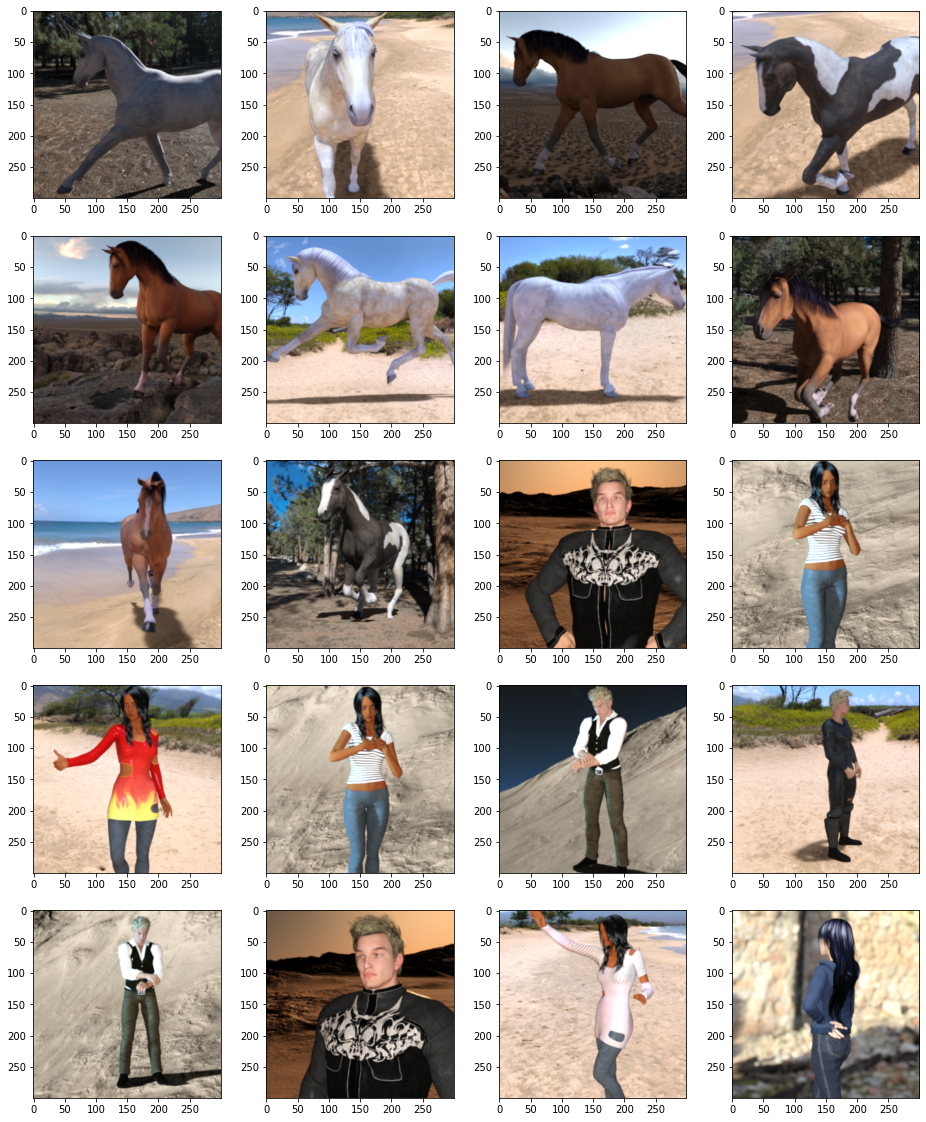

In [11]:
#Now, display 10 Horse images & 10 Human images
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_idx+=10

horse_pics = [os.path.join(horse_train_dir, filename) for filename in horse_files[pic_idx-10:pic_idx]]
human_pics = [os.path.join(human_train_dir, filename2) for filename2 in human_files[pic_idx-10:pic_idx]]

#Loop through the list to show image in plot
for i, image_path in enumerate(horse_pics + human_pics):
  #Setting up subplots...
  #Subplot index starts at 1
  sub_plot = plt.subplot(nrows, ncols, i+1)

  img = mpimg.imread(image_path)
  plt.imshow(img)

plt.show()


In [0]:
#Building model with layers
model = tf.keras.models.Sequential([
                                    #First Convolution
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Try with 300*300 size as well
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Second Convolution
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Third Convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    #Fourth Convolution
                                    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    # #Fifth Convolution
                                    # tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    # tf.keras.layers.MaxPooling2D(2,2),
                                    #Flattening the results to feed into Deep Neural Network
                                    tf.keras.layers.Flatten(),
                                    #Hidden layer with 512 neurons
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    #Output with 1 Neuron
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
#Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [0]:
#Compile the model
#Before compiling, import the required Optimizer(We use RMSprop)
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics=['accuracy'])

In [36]:
#Data Preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Rescale image by 1.0/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1/255)

#Flow training images in batches of 128 using the train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human', #Source directory for the training images
    target_size = (150, 150),
    batch_size = 128,
    class_mode = 'binary' #As, we have only 2 labels(Horse/Human)
)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**Training Phase**

In [37]:
history = model.fit(
    train_generator,
    epochs = 30,
    steps_per_epoch = 8,
    validation_data = validation_generator,
    validation_steps = 8
)

Epoch 1/30
8/8 [==============================] - 21s 3s/step - loss: 1.5316 - accuracy: 0.5417 - val_loss: 0.6661 - val_accuracy: 0.5430
Epoch 2/30
8/8 [==============================] - 21s 3s/step - loss: 0.6168 - accuracy: 0.7686 - val_loss: 0.4275 - val_accuracy: 0.7227
Epoch 3/30
8/8 [==============================] - 20s 3s/step - loss: 0.2976 - accuracy: 0.8966 - val_loss: 0.6835 - val_accuracy: 0.8594
Epoch 4/30
8/8 [==============================] - 20s 3s/step - loss: 0.1272 - accuracy: 0.9444 - val_loss: 1.7875 - val_accuracy: 0.7344
Epoch 5/30
8/8 [==============================] - 22s 3s/step - loss: 0.2352 - accuracy: 0.9033 - val_loss: 0.5548 - val_accuracy: 0.8867
Epoch 6/30
8/8 [==============================] - 23s 3s/step - loss: 0.3117 - accuracy: 0.8954 - val_loss: 0.8542 - val_accuracy: 0.8555
Epoch 7/30
8/8 [==============================] - 21s 3s/step - loss: 0.7538 - accuracy: 0.8432 - val_loss: 1.1088 - val_accuracy: 0.8164
Epoch 8/30
8/8 [==================

# **Running the Model**
It will allow us to choose file/files to upload and get prediction

In [41]:
#Importing required packages
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  #Predicting Images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0] > 0.5:
    print(f'{fn} is a Human')
  else:
    print(f'{fn} is a Horse')

Saving horse-web.jpg to horse-web (4).jpg
[0.]
horse-web.jpg is a Horse


**Observations**

1. We obtained the Accuracy of 83% before using Validation set
2. Still, the model is misclassifying the image that we are uploading. 

*   The reason for this is, we have a very less data for training.So, we are not giving validation set also.

3. After, using validation set, we got a better accurcy than the previous model(Accuracy = 92%)
*   Still, some images are misclassifying by the model. So, we reduce the image size to get the features clearly

4. After using Validation set & Reducing the image size, we obtained the accuracy of 99%.
*   And now, the model is correctly classifying the images which were misclassified before without validation & with high image size





